In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import GreenShield_exp
import numpy as np
import pandas as pd
from pathlib import Path

In [7]:
data_path = Path("D:\All Python\All_Big_raw_Data\LOS prediction\Traffic Dataset\DataLoader")
train_data = pd.read_csv(data_path / "traffic_data_luzern_train.csv")
val_data = pd.read_csv(data_path / "traffic_data_luzern_val.csv")
test_data = pd.read_csv(data_path / "traffic_data_luzern_test.csv")

In [10]:
# train_data.drop(train_data[train_data["speed"] == 0.0].index, inplace=True)
# train_data.drop(train_data[train_data["density"] == 0.0].index, inplace=True)
# train_data.drop(train_data[train_data["flow"] == 0.0].index, inplace=True)
# train_data.drop(train_data[train_data["rainfall"] == 0.0].index, inplace=True)
train_data = train_data.dropna()

In [11]:
train_data

,Unnamed: 0,flow,occ,date,density,speed,rainfall
0,1437,405.922343,0.077312,2015-02-27 12:00:00.000000000,0.293608,1382.531758,1.773
3,111,402.161518,0.076889,2015-01-05 11:00:00.000000000,0.291999,1377.268440,0.000
16,1298,266.239282,0.041635,2015-02-21 23:00:00.000000000,0.158117,1683.812356,0.880
18,740,495.865646,0.109453,2015-01-30 15:00:00.000000000,0.415668,1192.937384,0.008
32,435,272.536539,0.041784,2015-01-18 10:00:00.000000000,0.158682,1717.496947,0.000
...,...,...,...,...,...,...,...
7191,189,443.376677,0.088894,2015-01-08 14:00:00.000000000,0.337593,1313.346945,0.000
7200,1184,326.282377,0.060992,2015-02-17 09:00:00.000000000,0.231629,1408.642813,0.000
7206,769,284.872732,0.047180,2015-01-31 19:00:00.000000000,0.179175,1589.914269,0.371
7211,466,504.650417,0.112556,2015-01-19 16:00:00.000000000,0.427452,1180.600931,0.008


In [12]:
# k_j_data = [max(train_data["density"]) for i in range(len(train_data))]  ##

u_data = train_data["speed"].values
r_data = train_data["rainfall"].values
q_data = train_data["flow"].values

Both actual and predicted relative reductions in the sum of squares
  are at most 0.000000


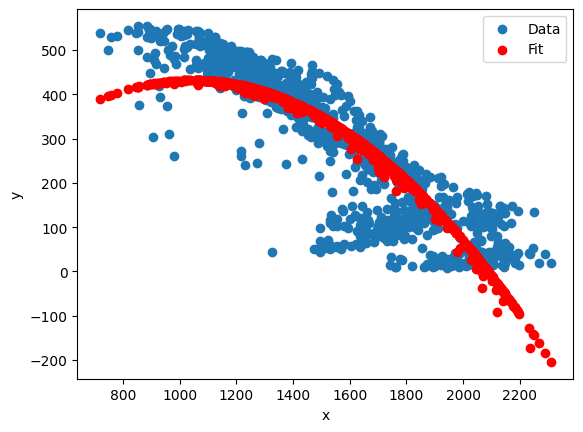

Fitted Parameters:
a = 0.01663286432729744  ===  b = 0.6292953011661291  ===  c = 7.644006559845917 === k_j = 0.8266156144990637
____________________________________________________
Error Parameters:
R2 = 0.7246697680684363  ===  MSE = 7057.905628648678


In [13]:
model = GreenShield_exp.GreenShield_EXP(None, u_data, r_data, q_data)
# model = GreenShield_exp.GreenShield_EXP(k_j_data, u_data, r_data, q_data)
model.fit([0.5, 0.5, 0.5, 0.5]) ##
model.plot()
model.error()
model.get_results()
